In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
df = pd.read_table('tc_data_counts.tsv', header=None, names=['link', 'author_gender', 'year', 'month',
                                                             'categories', 'tags', 'dist_m', 'dist_f',
                                                             'ment_m', 'ment_f', 'quotes_m', 'quotes_f'])

In [3]:
df.describe()

,year,month,dist_m,dist_f,ment_m,ment_f,quotes_m,quotes_f
count,113506.000000,113506.000000,113506.000000,113506.000000,113506.000000,113506.000000,113506.000000,113506.000000
mean,2011.835692,6.256409,0.831727,0.185541,1.200738,0.281668,1.463993,0.268277
std,2.140655,3.405504,1.539089,0.587122,2.590330,1.098384,11.516508,5.050184
min,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2016.000000,12.000000,73.000000,36.000000,143.000000,70.000000,560.000000,517.000000


In [4]:
def display_table(groupedby):
    """
    Take a grouped by object and display summaries of counts, sums and
    ratios across it.
    """
    agg_dict = OrderedDict([('month', {'count': 'count'})] + [
        (col, {'sum': np.sum}) for col in ['dist_m', 'dist_f', 'ment_m', 'ment_f', 'quotes_m', 'quotes_f']])
    agg_table = groupedby.aggregate(agg_dict)
    for counts in ['dist', 'ment', 'quotes']:
        sum_ = agg_table[counts + '_m'] + agg_table[counts + '_f']
        for gend in ['f']:
            agg_table['{}_{}_ratio'.format(counts, gend)] = agg_table[counts + '_' + gend]/sum_
    return agg_table

In [20]:
def plot_ratio_over_time(df, criterion, gender):
    """
    Criterion is something like 'ment', 'dist' or 'quotes'
    gender is 'm' or 'f'.
    This is a plot of how the ratio of that gender's counts
    in criterion have changed over time.
    """
    gender = gender.lower()[0]
    gender_to_string = {
        'm': 'males',
        'f': 'females'
    }
    criterion_to_string = {
        'ment': 'Total mentions',
        'dist': 'Mentions in articles',
        'quotes': 'Quotes'
    }
    gb_y = df.groupby(['year'])
    gb_gend = df.groupby(['author_gender'])
    plot_col = '{}_{}_ratio'.format(criterion, gender)
    agg_table_y = display_table(gb_y)
    ri = agg_table_y.reset_index()
    # plt.gca().xaxis.set_ticklabels([str(a) for a in list(ri['year'])])
    plt.plot(ri['year'], ri[plot_col], label='Total')
    print ri['year'], '\n'.join([str(a) for a in ri[plot_col]])
    plt.xlabel('Year')
    plt.ylabel('Fraction of {} among {}'.format(gender_to_string[gender], criterion_to_string[criterion]))
    for key, grp in df.groupby(['author_gender']):
        if key not in ['MALE', 'FEMALE']:
            continue
        table = display_table(grp.groupby(['year']))
        ri = table.reset_index()
        plt.plot(ri['year'], ri[plot_col], label = '{} authors'.format(key.title()))
        print key.title()
        print ri['year'], '\n'.join([str(a) for a in ri[plot_col]])
    plt.legend(loc='upper left')

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
Name: year, dtype: int64 0.166828407587
0.162781073251
0.172629257535
0.174501237037
0.176261228179
0.187432138979
0.215802397804
0.224934612031
Female
0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
Name: year, dtype: int64 0.161341853035
0.158993576017
0.1789019124
0.187770823303
0.20118440533
0.235740664752
0.266746173723
0.28038277512
Male
0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
Name: year, dtype: int64 0.16617603768
0.164865234642
0.169784400761
0.174333333333
0.165545511877
0.161286840117
0.184998829862
0.186554621849


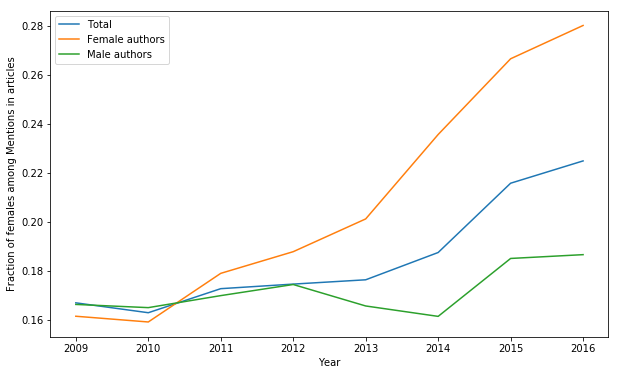

In [21]:
plot_ratio_over_time(df, 'dist', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Distinct_mentions_over_time.png', dpi=100)

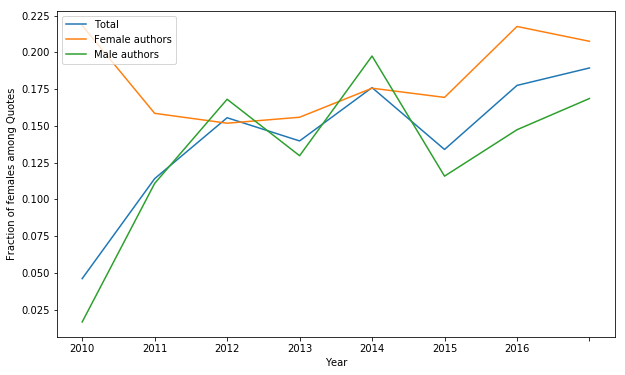

In [7]:
plot_ratio_over_time(df, 'quotes', 'f')
plt.gcf().set_size_inches(10, 6)
plt.savefig('Quotes_over_time.png', dpi=100)